# Course 2 - Task 2: Prepare & Explore Data for Credit One Customer Loan Defaults

Author: Jason Rodriguez
***

## Course Objectives
1. Continued learning focus on Exploratory Data Analysis & PreProcessing Data


## Business Problems
1. Credit One is experiencing an ***increase*** in customer defaults which ultimtely can lead to lost in clients and business
2. Credit One does not have an reliable method for identifying which customer may default and how to predict credit balance. 

## Business Goals
1. Credit One seeking solution to ***predict the right amount of credit*** to extend to customers so it does not over extend themselves and reduce risks with customers defaulting. 

## Purpose of Remaining Sections
The following sections are broken into sections that step through the process of understanding and making inferences of the available Credit One data.  The sections are as follows
1. Setting Up the Environment
2. PreProcessing & Initial Data Analysis
3. EDA: Univariate Analysis
4. EDA: Bivariate Analysis
5. EDA: Multi-variate Analysis
6. EDA: Correlation / Covariance Analysis

***

# 1.0 - Setting Up The Environment

In [1]:
#IMPORTING LIBRARIES
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import pandas_profiling
import matplotlib as mpl
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import pylab as pylab
from math import sqrt

#Set Default MatPlot Figure Size
pylab.rcParams['figure.figsize']=(10.0,8.0)

from sklearn import preprocessing

In [2]:
#SKLearn Components
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR, SVC

## Data Load

In [3]:
#Read Data Source File
credit = pd.read_csv("/Users/JasonRodriguez/Documents/UT-Data-Analytics-Program/2020-Cohort/C2-T2/Source-Data/default of credit card clients.csv")

In [4]:
#Validate first 5 row in the dataframe and successful data load
credit.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,female,university,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,default
1,2,120000,female,university,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,default
2,3,90000,female,university,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,not default
3,4,50000,female,university,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,not default
4,5,50000,male,university,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,not default


**OBSERVATION:**
25 columns (features) within dataframe

## 2.0 - Pre-Processing & Initial Data Analysis

In [5]:
#High-level and basic statistical details of the dataframe
credit.describe()

,ID,LIMIT_BAL,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,...,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567
std,8660.398374,129747.661567,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,...,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775
min,1.000000,10000.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000
50%,15000.500000,140000.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000
75%,22500.250000,240000.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000
max,30000.000000,1000000.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000


### Data Inferences: 
1. 30k records
2. STD is low among all features except age which could be expected
3. 3 object columns (Sex, Education, and Default status) did not display which are nominal values all others are numeric

In [6]:
#Dataframe information - list of featurs, type, non-null count
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          30000 non-null  int64 
 1   LIMIT_BAL                   30000 non-null  int64 
 2   SEX                         30000 non-null  object
 3   EDUCATION                   30000 non-null  object
 4   MARRIAGE                    30000 non-null  int64 
 5   AGE                         30000 non-null  int64 
 6   PAY_0                       30000 non-null  int64 
 7   PAY_2                       30000 non-null  int64 
 8   PAY_3                       30000 non-null  int64 
 9   PAY_4                       30000 non-null  int64 
 10  PAY_5                       30000 non-null  int64 
 11  PAY_6                       30000 non-null  int64 
 12  BILL_AMT1                   30000 non-null  int64 
 13  BILL_AMT2                   30000 non-null  in

**OBSERVATION:**
All columns are non-null, 3 object types, 22 integer types

In [7]:
#Pandas Profiling
#pandas_profiling.ProfileReport(credit)

In [8]:
#Check for Missing Values
print(credit.isnull().sum())

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64


**OBSERVATION**: no features contain null values

In [9]:
#Print Column Names within Dataframe
credit.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [10]:
#Rename Columns to drive consistency within dateframe
credit = credit.rename(columns={'default payment next month': 'Default_Status', 'PAY_0':'PAY_1'}) 

In [11]:
#validation check to see if PAY_0 and Default Payment Next Month were changed
credit.columns 

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'Default_Status'],
      dtype='object')

In [12]:
#Drop Un-needed columns
credit = credit.drop(['ID'], axis=1)

***Note*** ****dropping ID feature is a good practice given it does not add value in Machine learning it would give the ID column more strength b/c it so linear****

In [13]:
#Validating ID column was droppped
credit.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'Default_Status'],
      dtype='object')

In [14]:
#Drop Duplicates
credit = credit.drop_duplicates()

In [15]:
#Replacing characters with numeric Values per source definition
credit['SEX'].replace(['male','female'],[1,2], inplace=True) #1=male; 2=female
credit['EDUCATION'].replace(['graduate school', 'university', 'high school', 'other'], [1, 2, 3, 0],inplace=True)
credit['Default_Status'].replace(['default', 'not default'],[1,0],inplace=True) #1-default; 2-not defaulted

In [16]:
#Binning Age for EDA and visualization purposes only
credit['AGE_BIN2']=pd.cut(credit['AGE'],bins=[20,30,40,50,60,70,80], labels=['20-30', '30-40', '40-50', '50-60', '60-70', '70+'])
credit.AGE_BIN2.unique()

[20-30, 30-40, 50-60, 40-50, 60-70, 70+]
Categories (6, object): [20-30 < 30-40 < 40-50 < 50-60 < 60-70 < 70+]

**Data Transformation**
Replace -2, -1 value in all Payment Status columns (PAY_1 to PAY_6) to zero (0). From a business perspective, -2 (no consumption); -1 (paid in full); 0 (use of revolving credit) are all considered good/same and can be changed to zero (0).  Otherwise, Machine Learning may consider -2, -1 as bad values. Values 1 to 8 are payment delays and need not be changed. 

In [17]:
Columns = ['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

for i in range(len(Columns)):
    credit[Columns[i]] = credit[Columns[i]].replace(-2, 0)
    credit[Columns[i]] = credit[Columns[i]].replace(-1, 0)
    i = i+1

***
## 3.0 - EDA: UNIVARIATE ANALYSIS

**Objective** to explore data distribution of each feature individually within the dataframe

**Categorical Features:**
1. Sex
2. Education
3. Marriage
4. Default Status
5. Pay 1-6

**Continuous Featurse:**
1. Credit Limit
2. Age
3. Bill Amt 1-6
4. Payment Amt 1-6

### --Feature: Gender--

Text(0.5, 1.0, '# of Clients by Gender')

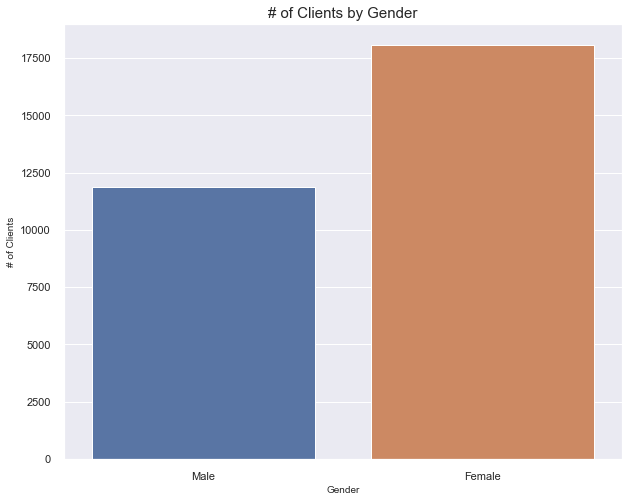

In [18]:
# Using Seaborn Countplot to Visualize the Sex distribution

sns.set(style="darkgrid")
gender = sns.countplot(x="SEX",data =credit, palette = 'deep')

# Configure X and Y axis
gender.set_xticklabels(['Male', 'Female'])
gender.set_xlabel("Gender", fontsize=10)
gender.set_ylabel("# of Clients", fontsize=10)

#Set title
plt.title('# of Clients by Gender', fontsize=15)

**OBSERVATION:**
1. Females are largest population at 60% (18091)
2. Males make up 40% (11874)



### --Feature: Education--

In [19]:
#Understand quick count of education across categories
credit['EDUCATION'].value_counts()

2    14019
1    10563
3     4915
0      468
Name: EDUCATION, dtype: int64

Text(0.5, 1.0, '# of Clients by Education Level')

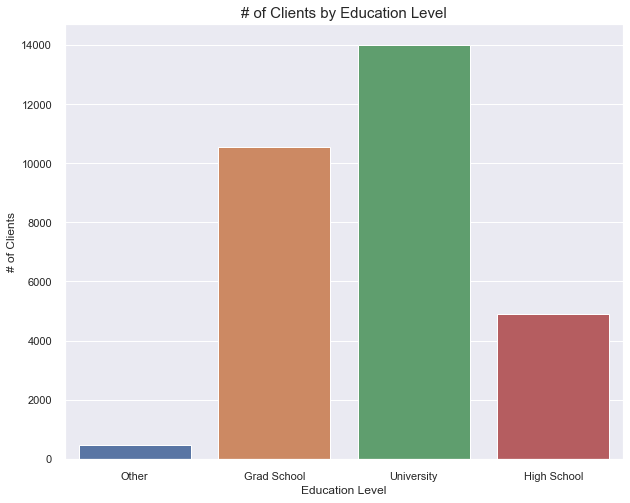

In [20]:
# Countplot to Visualize the Education distribution

sns.set(style="darkgrid")
education = sns.countplot(x="EDUCATION",data =credit, palette = 'deep')

# Configure X and Y axis
education.set_xticklabels(['Other','Grad School', 'University', 'High School'])
education.set_xlabel("Education Level", fontsize=12)
education.set_ylabel("# of Clients", fontsize=12)

#Set title
plt.title('# of Clients by Education Level', fontsize=15)

**OBSERVATION:**
1. 82% of clients have post secondary education - 47% (University) & 35% (Grad School)
2. 16% have high school
3. 2% have other

### --Feature: Marriage--

In [21]:
#Understand quick count of marriage across categories
credit['MARRIAGE'].value_counts()

2    15945
1    13643
3      323
0       54
Name: MARRIAGE, dtype: int64

**OBSERVATION:**

0 - Other; 1 - Married; 2 - Single; 3 - Divorce

1. Other - 0.2% of population
2. Married - 45.5% of population
3. Single - 53.2% of population
4. Divorce - 1.1% of population

Text(0.5, 1.0, '# of Clients by Marriage Status')

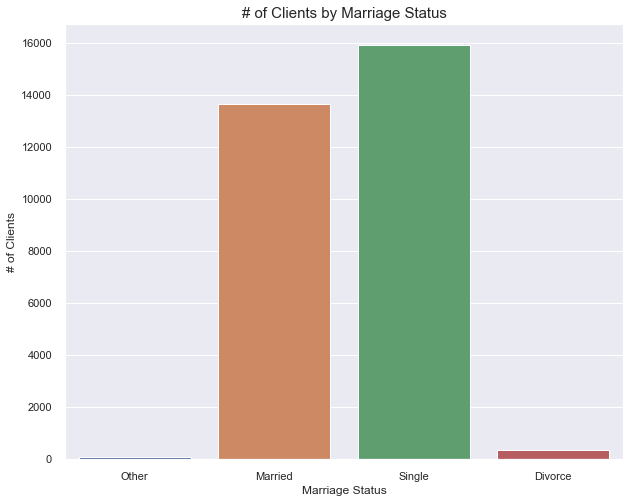

In [22]:
# Countplot to Visualize the Marriage distribution

sns.set(style="darkgrid")
marriage = sns.countplot(x="MARRIAGE",data =credit, palette = 'deep')

# Configure X and Y axis
marriage.set_xticklabels(['Other','Married', 'Single', 'Divorce'])
marriage.set_xlabel("Marriage Status", fontsize=12)
marriage.set_ylabel("# of Clients", fontsize=12)

#Set title
plt.title('# of Clients by Marriage Status', fontsize=15)

**OBSERVATION:**
1. Over half of the population base are ***SINGLE*** at 53.2%
2. Second higher concentration are married cliented at 45.5%

### --Feature: Default Status--

In [23]:
#Understand quick count of marriage across categories
credit['Default_Status'].value_counts()

0    23335
1     6630
Name: Default_Status, dtype: int64

Text(0.5, 1.0, '# of Clients by Default Status')

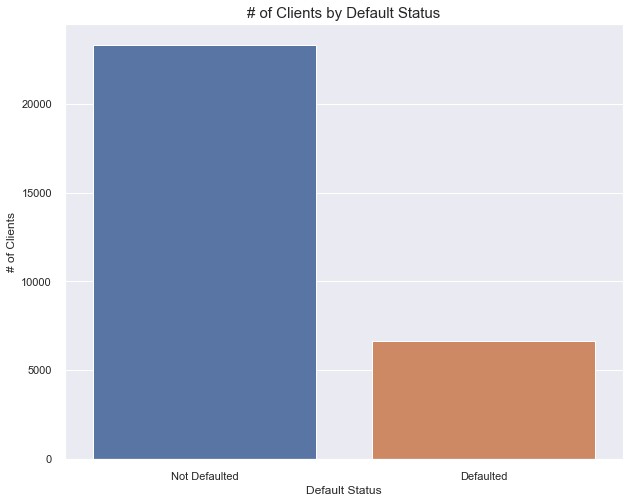

In [24]:
# Countplot to Visualize the Default Status distribution

sns.set(style="darkgrid")
default = sns.countplot(x="Default_Status",data =credit, palette = 'deep')

# Configure X and Y axis
default.set_xticklabels(['Not Defaulted','Defaulted'])
default.set_xlabel("Default Status", fontsize=12)
default.set_ylabel("# of Clients", fontsize=12)

#Set title
plt.title('# of Clients by Default Status', fontsize=15)

**OBSERVATION:**
1. 22% of customers ***DEFAULTED*** (6630 clients defaulted)
2. 78% of customers did ***NOT DEFAULT*** (23335 clients did not default)

### --Feature: Pay Status--

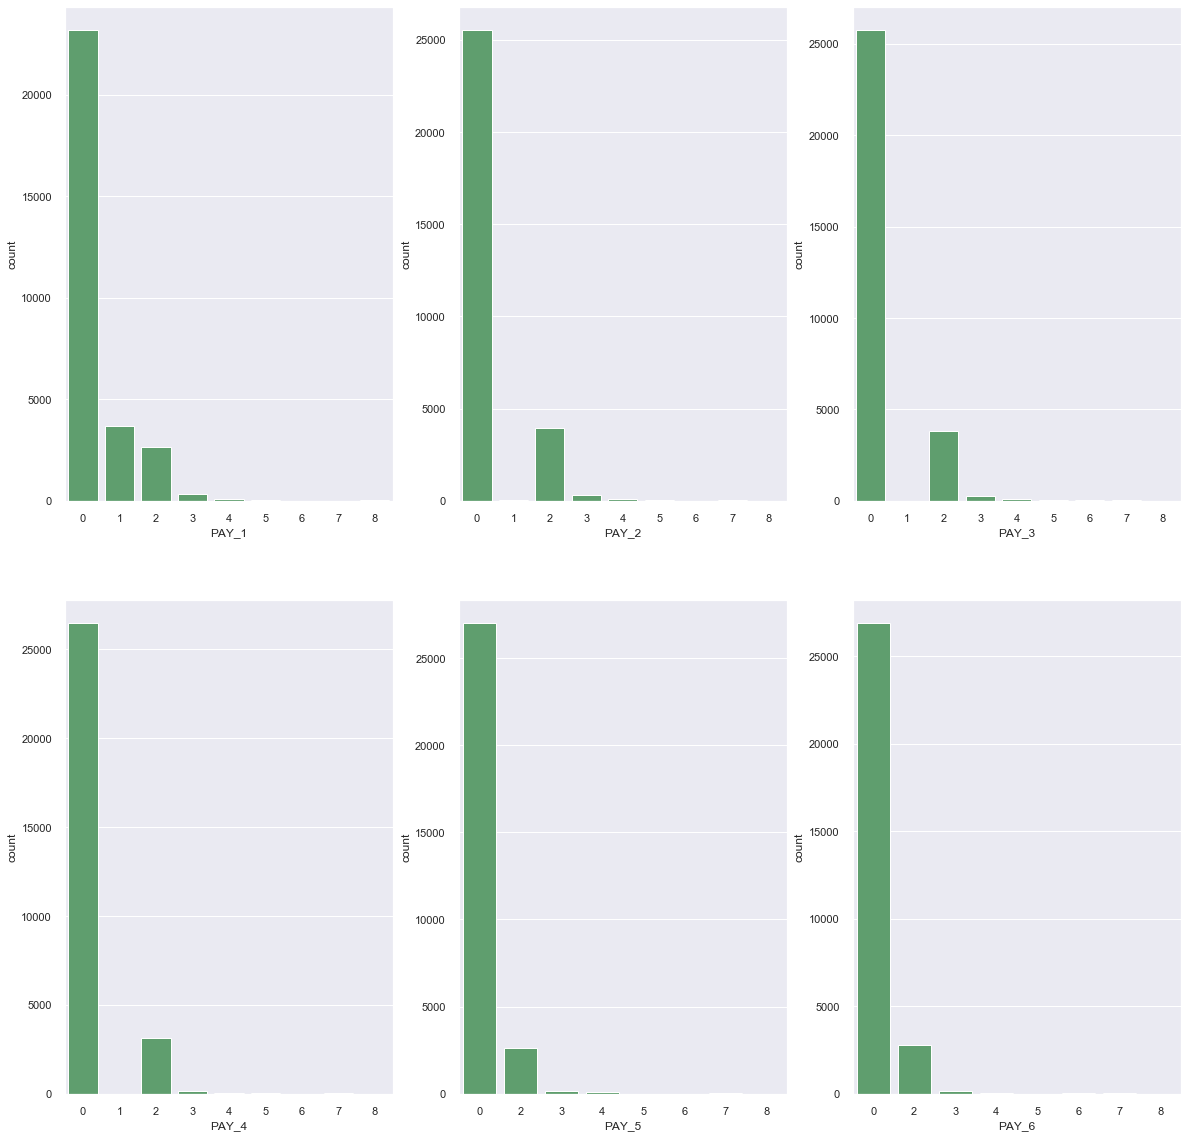

In [25]:
#Set up chart for 6 subplots for 6 columns

fig,ax = plt.subplots(2,3,figsize=(20,20))
sns.set(font_scale=1, style="darkgrid")

#Creating subplots
sns.countplot(x='PAY_1', data=credit, ax=ax[0,0], color='g')
sns.countplot(x='PAY_2', data=credit, ax=ax[0,1], color='g')
sns.countplot(x='PAY_3', data=credit, ax=ax[0,2], color='g')
sns.countplot(x='PAY_4', data=credit, ax=ax[1,0], color='g')
sns.countplot(x='PAY_5', data=credit, ax=ax[1,1], color='g')
sns.countplot(x='PAY_6', data=credit, ax=ax[1,2], color='g')

**OBSERVATION:**
For payment the highest value is set at 0 (zero) across Pay_0 to Pay_6

## --Feature: Credit Limit--

Text(0.5, 1.0, 'Number of Clients by Credit limit')

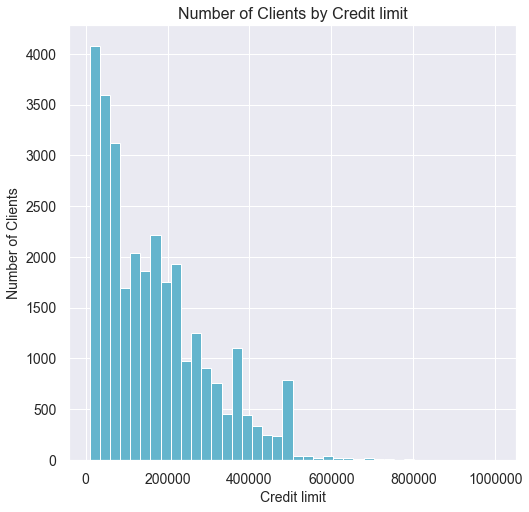

In [26]:
plt.figure(figsize=(8,8)) 

# Plot the graph
plt.hist(credit['LIMIT_BAL'],color="c",bins=40)

# Configure X and Y axis
plt.xlabel('Credit limit', fontsize=14)
plt.ylabel('Number of Clients', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Set the title
plt.title("Number of Clients by Credit limit", fontsize=16)

Text(0.5, 1.0, 'Distribution of Credit Limit')

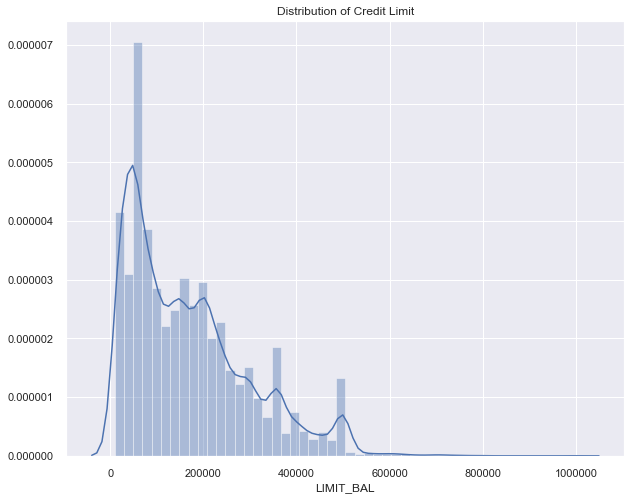

In [27]:
#Credit_Limit = credit
cred_lim=sns.distplot(credit['LIMIT_BAL'])
cred_lim.set_title("Distribution of Credit Limit")

## --Feature: Age--

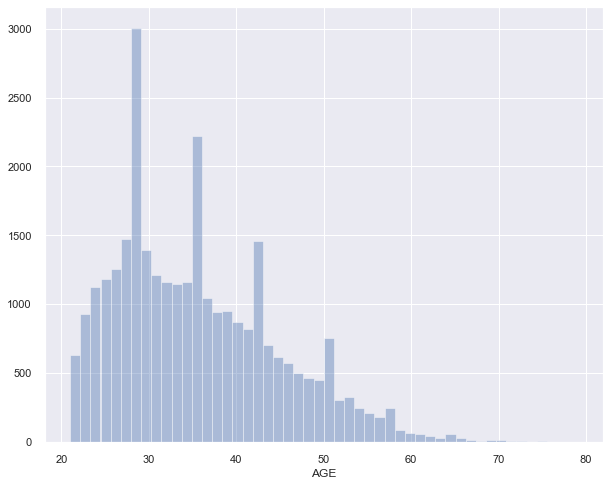

In [28]:
#Age distribution
sns.distplot(credit['AGE'],norm_hist=False,kde=False);

**OBSERVATION:**
1. Youngest client is about 21 years old
2. Oldest client is about 77 years old
3. Largest client age is about 28 years old
4. Most client is age range from 24 to 38 years old
5. Appears some age groups have spikes in the number of clients

In [29]:
#Counting Age Bin
credit['AGE_BIN2'].value_counts()

20-30    10997
30-40    10702
40-50     5997
50-60     1997
60-70      257
70+         15
Name: AGE_BIN2, dtype: int64

Text(0.5, 1.0, '# of Clients by Age Groups')

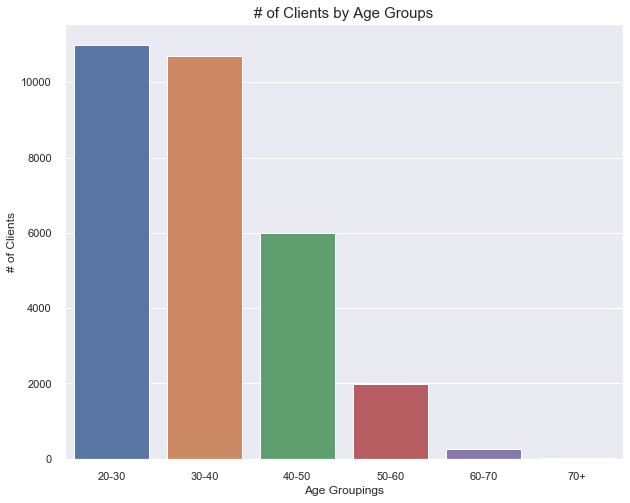

In [30]:
# Countplot to Visualize the Age Bin distribution

sns.set(style="darkgrid")
AgeBin = sns.countplot(x="AGE_BIN2",data =credit, palette = 'deep')

# Configure X and Y axis
AgeBin.set_xlabel("Age Groupings", fontsize=12)
AgeBin.set_ylabel("# of Clients", fontsize=12)

#Set title
plt.title('# of Clients by Age Groups', fontsize=15)

**OBSERVATIONS:**
20-30 make up 37% of the client population; while 
30-40 make up 36% of the client population

## --Feature: Bill Amt--

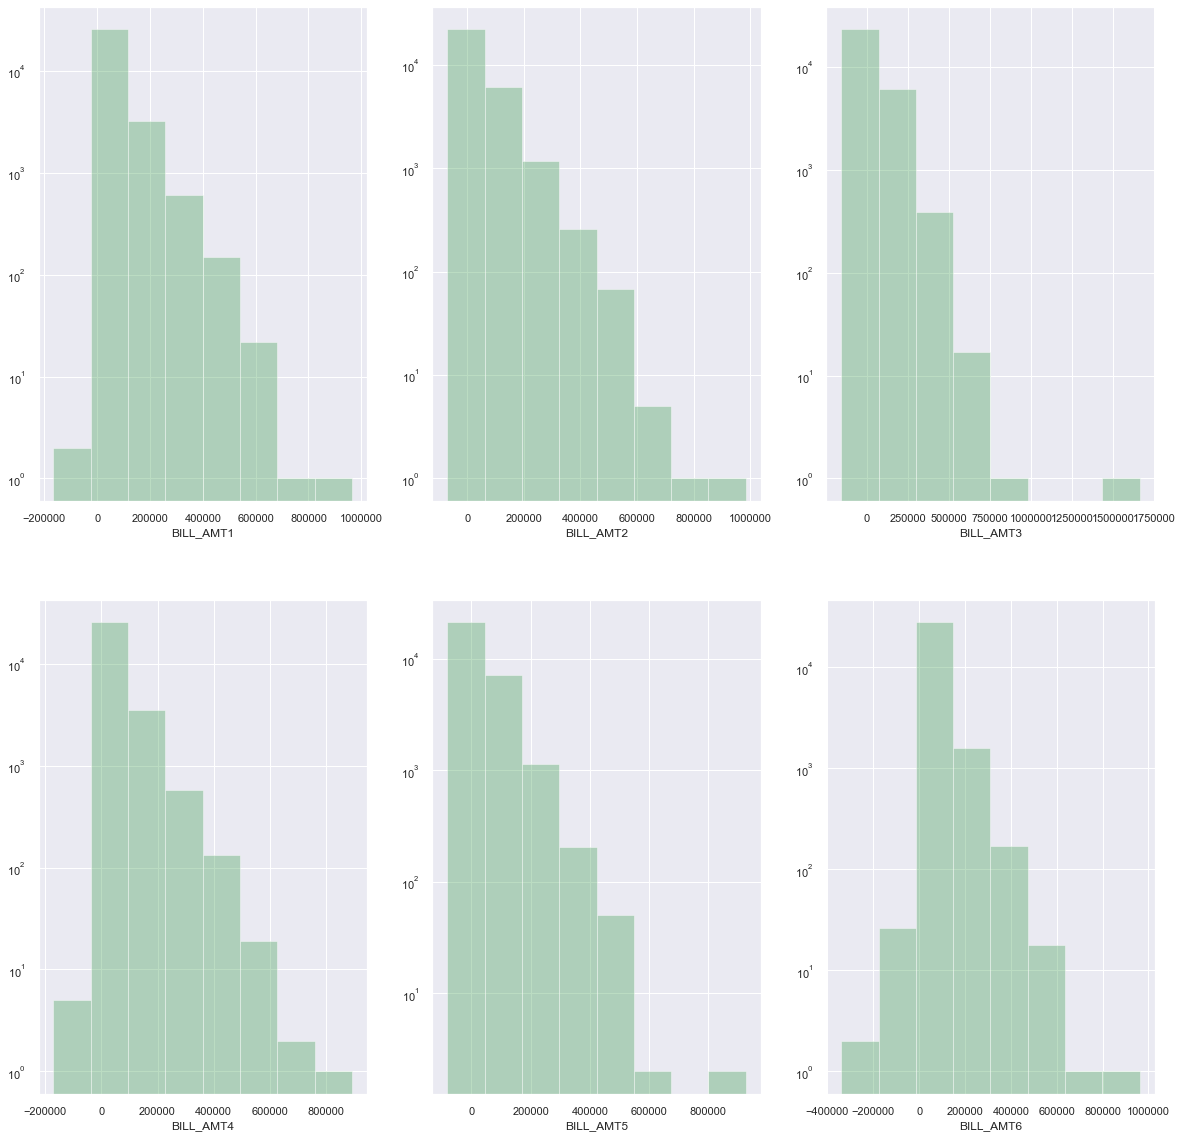

In [31]:
#Set up chart for 6 subplots for 6 columns

fig,ax = plt.subplots(2,3,figsize=(20,20))
sns.set(font_scale=1, style="darkgrid")

#Creating subplots
sns.distplot(credit['BILL_AMT1'], bins=8, kde=False, rug=False, ax=ax[0,0], color='g', hist_kws={'log':True})
sns.distplot(credit['BILL_AMT2'], bins=8, kde=False, rug=False, ax=ax[0,1], color='g', hist_kws={'log':True})
sns.distplot(credit['BILL_AMT3'], bins=8, kde=False, rug=False, ax=ax[0,2], color='g', hist_kws={'log':True})
sns.distplot(credit['BILL_AMT4'], bins=8, kde=False, rug=False, ax=ax[1,0], color='g', hist_kws={'log':True})
sns.distplot(credit['BILL_AMT5'], bins=8, kde=False, rug=False, ax=ax[1,1], color='g', hist_kws={'log':True})
sns.distplot(credit['BILL_AMT6'], bins=8, kde=False, rug=False, ax=ax[1,2], color='g', hist_kws={'log':True})



**OBSERVATION:**

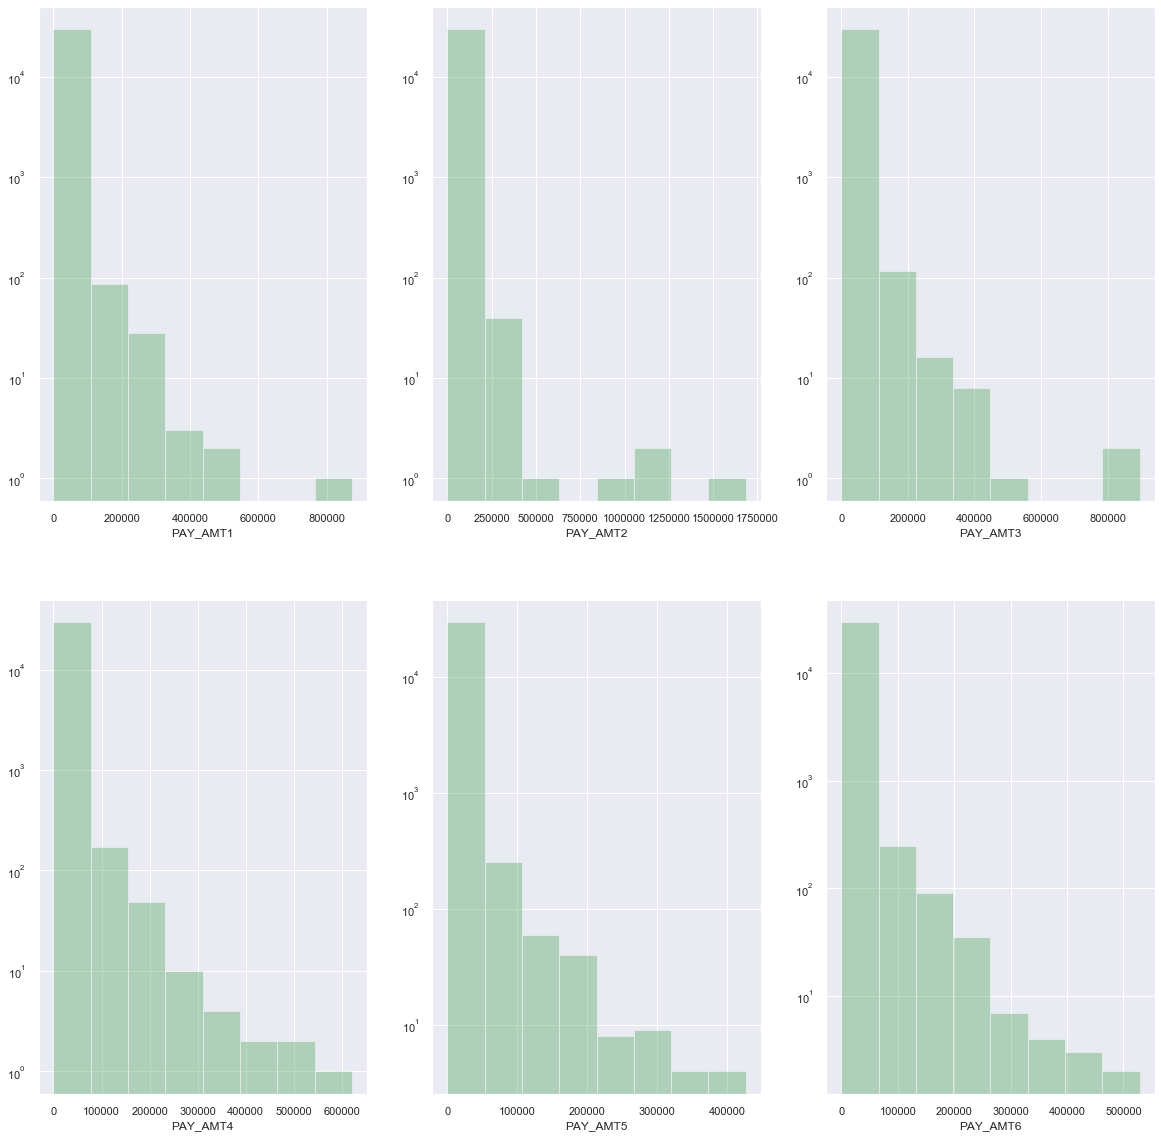

In [32]:
#Set up chart for 6 subplots for 6 columns

fig,ax = plt.subplots(2,3,figsize=(20,20))
sns.set(font_scale=1, style="darkgrid")

#Creating subplots
sns.distplot(credit['PAY_AMT1'], bins=8, kde=False, rug=False, ax=ax[0,0], color='g', hist_kws={'log':True})
sns.distplot(credit['PAY_AMT2'], bins=8, kde=False, rug=False, ax=ax[0,1], color='g', hist_kws={'log':True})
sns.distplot(credit['PAY_AMT3'], bins=8, kde=False, rug=False, ax=ax[0,2], color='g', hist_kws={'log':True})
sns.distplot(credit['PAY_AMT4'], bins=8, kde=False, rug=False, ax=ax[1,0], color='g', hist_kws={'log':True})
sns.distplot(credit['PAY_AMT5'], bins=8, kde=False, rug=False, ax=ax[1,1], color='g', hist_kws={'log':True})
sns.distplot(credit['PAY_AMT6'], bins=8, kde=False, rug=False, ax=ax[1,2], color='g', hist_kws={'log':True})




**OBSERVATION:**

***

## 4.0 - EDA: BIVARIATE ANALYSIS

**Objective** is to explore the relationship of various features to each other. Primary focus will be on Default Status

1. Default Status & Gender
2. Default Status & Education
3. Default Status & Marriage
4. Default Status & Age
5. Default Status & Credit Limit
6. Default Status & Payment
7. Default Status & Bill Amount
8. Default Status & Pay Amount

### 4.1 - Default Status vs Gender

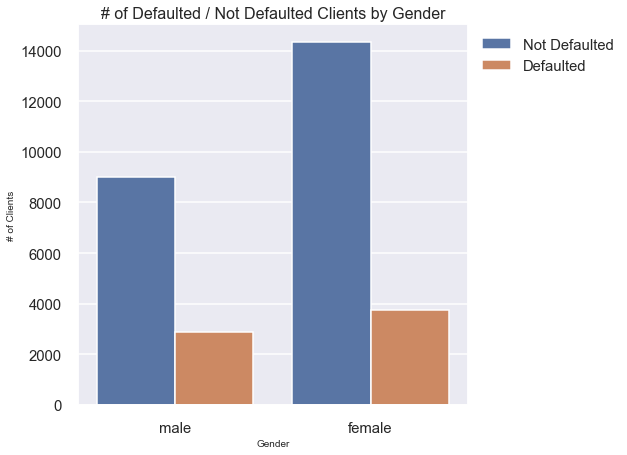

In [33]:
#Default vs Sex
sns.set(rc={'figure.figsize':(7,7)})
sns.set_context("talk", font_scale=0.9)

#Set x and y axis labels
genderdefault = sns.countplot(x='SEX', hue='Default_Status', data=credit)
genderdefault.set_xticklabels(['male', 'female'])
genderdefault.set_ylabel('# of Clients', fontsize=10)
genderdefault.set_xlabel('Gender', fontsize=10)

#Set Title
plt.title("# of Defaulted / Not Defaulted Clients by Gender", fontsize=16)

#Set Legend
legend_labels, _=genderdefault.get_legend_handles_labels()
genderdefault.legend(legend_labels, ['Not Defaulted', 'Defaulted'], bbox_to_anchor=(1,1))

plt.show()

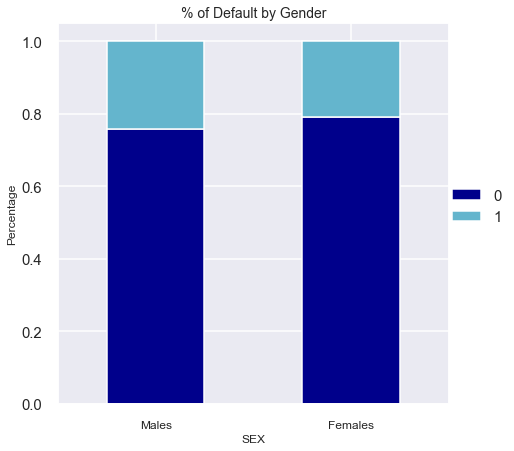

In [34]:
#Visualize % Default by Gender
s=pd.crosstab(credit['SEX'], credit['Default_Status']).apply(lambda r: r/r.sum(), axis=1)

colors = ['darkblue','c']

s.loc[:,:].plot.bar(stacked=True, color=colors, figsize=(7,7))

index = np.arange(2)
labels = ['Males', 'Females']


plt.xlabel('SEX', fontsize=12)
plt.ylabel('Percentage', fontsize=12)
plt.title('% of Default by Gender', fontsize=14)
plt.xticks(index, labels, fontsize=12, rotation=0)

plt.legend(bbox_to_anchor=(1.17, .6))


In [35]:
#Default count by gender

default0 = credit.groupby(credit['SEX'][credit['Default_Status']==0]).size().reset_index(name='Not Default')

default1 = credit.groupby(credit['SEX'][credit['Default_Status']==1]).size().reset_index(name='Default')

total = credit.groupby('SEX').size().reset_index(name='Total')

percent_default = round((default1['Default']/total['Total'])*100,2).reset_index(name='% Defaulted')
percent_not_default = round((default0['Not Default']/total['Total'])*100,2).reset_index(name='% Not Defaulted')

sexTable = default0.join(default1['Default']).join(total['Total']).join(percent_default['% Defaulted']).join(percent_not_default['% Not Defaulted'])
sexTable['SEX'] = ['Male', 'Female']
sexTable

,SEX,Not Default,Default,Total,% Defaulted,% Not Defaulted
0,Male,9005,2869,11874,24.16,75.84
1,Female,14330,3761,18091,20.79,79.21


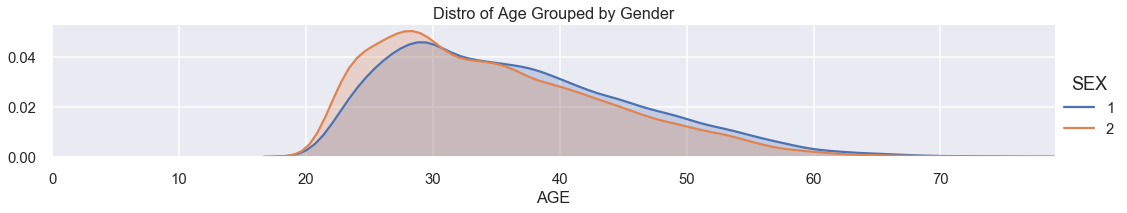

In [36]:
#Grouped by Education
fig = sns.FacetGrid(credit, hue='SEX', aspect=5)
fig.map(sns.kdeplot, 'AGE', shade=True)
older=credit['AGE'].max()
fig.set(xlim=(0,older))
fig.set(title='Distro of Age Grouped by Gender')
fig.add_legend()

**OBSERVATION:**
1. 20.79% of Females Default -vs- 24.16% of Males Defaulting
2. Males typically default more often than females by nearly 4% more. 
3. Females are largest population at 60% (18091), especially under the age of 30
4. Males make up 40% (11874) and have higher population starting about 35 years of age
5. Nearly ***80%*** of the females population does ***not default***


### 4.2 - Default Status & Education

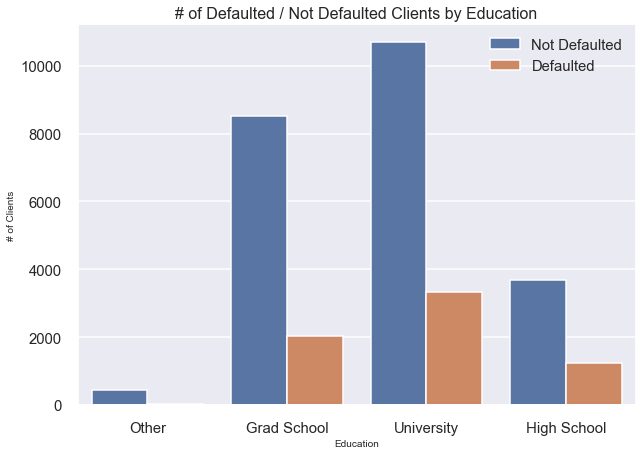

In [37]:
#Default vs Education
sns.set(rc={'figure.figsize':(10,7)})
sns.set_context("talk", font_scale=0.9)

#Set x and y axis labels
EduDefault = sns.countplot(x='EDUCATION', hue='Default_Status', data=credit)
EduDefault.set_xticklabels(['Other', 'Grad School', 'University', 'High School'])
EduDefault.set_ylabel('# of Clients', fontsize=10)
EduDefault.set_xlabel('Education', fontsize=10)

#Set Title
plt.title("# of Defaulted / Not Defaulted Clients by Education", fontsize=16)

#Set Legend
legend_labels, _=EduDefault.get_legend_handles_labels()
EduDefault.legend(legend_labels, ['Not Defaulted', 'Defaulted'], bbox_to_anchor=(1,1))

plt.show()

**OBSERVATION:**
1. "Other" category appears to be 100% not defaulted but very limit clients in this group
2. Client with 'University' degrees have greatest amount of defaulted & not defaulted but also have the largest population base

In [38]:
#Default count by Education level
default0 = credit.groupby(credit['EDUCATION'][credit['Default_Status']==0]).size().reset_index(name='Not Default')

default1 = credit.groupby(credit['EDUCATION'][credit['Default_Status']==1]).size().reset_index(name='Default')

total = credit.groupby('EDUCATION').size().reset_index(name='Total')

percent_default = round((default1['Default']/total['Total'])*100,2).reset_index(name='Percent_Defaulted')
percent_not_default = round((default0['Not Default']/total['Total'])*100,2).reset_index(name='Percent_Not_Defaulted')

eduTable = default0.join(default1['Default']).join(total['Total']).join(percent_default['Percent_Defaulted']).join(percent_not_default['Percent_Not_Defaulted'])
eduTable['EDUCATION'] = ['Other', 'Grad School', 'University', 'High School']
eduTable

,EDUCATION,Not Default,Default,Total,Percent_Defaulted,Percent_Not_Defaulted
0,Other,435,33,468,7.05,92.95
1,Grad School,8531,2032,10563,19.24,80.76
2,University,10691,3328,14019,23.74,76.26
3,High School,3678,1237,4915,25.17,74.83


**OBSERVATION:**
1. High School clients have a lower count compare to Grad School and University but ***has higher percentage*** of defaults at 25.17%
2. Other has the lowest count but highest percentage of not defaulting - question: is this due to lower count or something else?  
3. 19.24% of Grad clients & 23.73% of University clients default

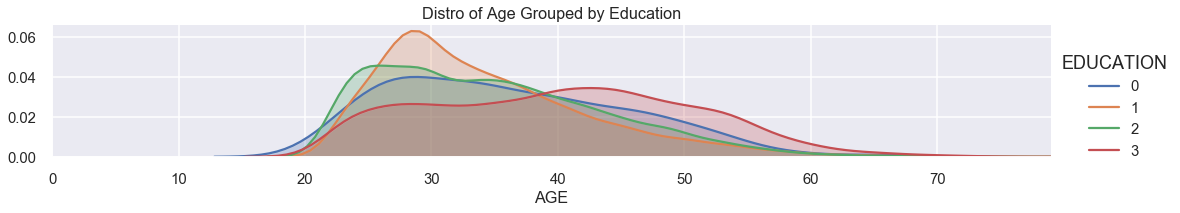

In [39]:
#Grouped by Education
fig = sns.FacetGrid(credit, hue='EDUCATION', aspect=5)
fig.map(sns.kdeplot, 'AGE', shade=True)
older=credit['AGE'].max()
fig.set(xlim=(0,older))
fig.set(title='Distro of Age Grouped by Education')
fig.add_legend()

**OBSERVATION:**
1. Grad School has largest volume between 25 and 35 year old when compare to other education categories
2. High School has largest volume after age 39 years old when compare to other education categories

### 4.3 - Default Status & Marriage

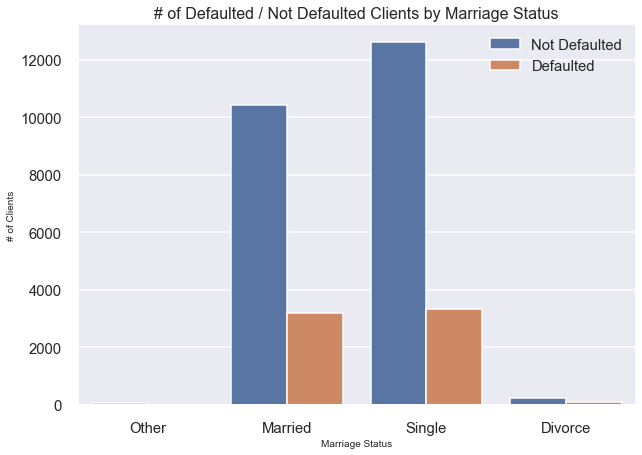

In [40]:
#Default vs Marriage
sns.set(rc={'figure.figsize':(10,7)})
sns.set_context("talk", font_scale=0.9)

#Set x and y axis labels
MarriageDefault = sns.countplot(x='MARRIAGE', hue='Default_Status', data=credit)
MarriageDefault.set_xticklabels(['Other', 'Married', 'Single', 'Divorce'])
MarriageDefault.set_ylabel('# of Clients', fontsize=10)
MarriageDefault.set_xlabel('Marriage Status', fontsize=10)

#Set Title
plt.title("# of Defaulted / Not Defaulted Clients by Marriage Status", fontsize=16)

#Set Legend
legend_labels, _=MarriageDefault.get_legend_handles_labels()
MarriageDefault.legend(legend_labels, ['Not Defaulted', 'Defaulted'], bbox_to_anchor=(1,1))

plt.show()

In [41]:
#Default count by marriage

default0 = credit.groupby(credit['MARRIAGE'][credit['Default_Status']==0]).size().reset_index(name='Not Default')

default1 = credit.groupby(credit['MARRIAGE'][credit['Default_Status']==1]).size().reset_index(name='Default')

total = credit.groupby('MARRIAGE').size().reset_index(name='Total')

percent_default = round((default1['Default']/total['Total'])*100,2).reset_index(name='% Defaulted')
percent_not_default = round((default0['Not Default']/total['Total'])*100,2).reset_index(name='% Not Defaulted')

marryTable = default0.join(default1['Default']).join(total['Total']).join(percent_default['% Defaulted']).join(percent_not_default['% Not Defaulted'])
marryTable['MARRIAGE'] = ['Other', 'Married', 'Single', 'Divorce']
marryTable

,MARRIAGE,Not Default,Default,Total,% Defaulted,% Not Defaulted
0,Other,49,5,54,9.26,90.74
1,Married,10442,3201,13643,23.46,76.54
2,Single,12605,3340,15945,20.95,79.05
3,Divorce,239,84,323,26.01,73.99


**OBSERVATION:**
1. Divorce clients have ***higher default percentage*** compare to any other marriage status
2. "Other" clients have ***highest percentage*** of not defaulting on loans
3. Married and Single client are fairly distributed and % of defaults are tight (23%-Married & 20%-Singles)

### 4.4 - Default Status & Age


Text(0.5, 1.0, 'Number of default Customers by Age')

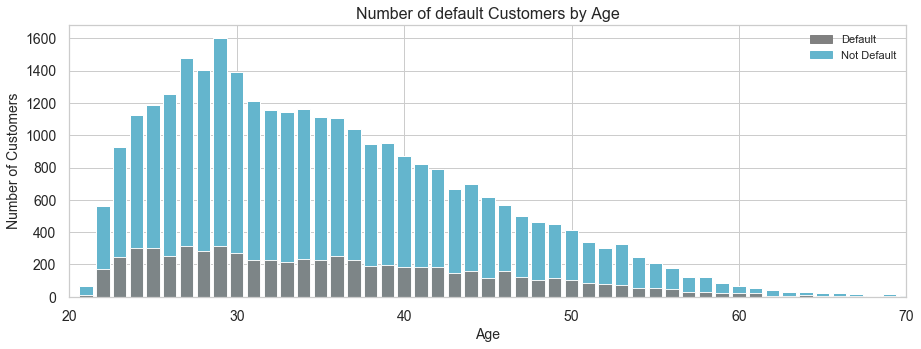

In [42]:
## Plot distribution of Age data with default, not default count
sns.set(style="whitegrid")
plt.figure(figsize=(15,5))

# Plot the graph
total = credit['AGE'].value_counts()
default = credit['AGE'][(credit['Default_Status']==1)].value_counts()

plt.bar(total.index, total, align='center', color='c')
plt.bar(default.index, default, align='center', color='gray', alpha=0.9)

# Set X and y axis labels
plt.xlabel("Age", fontsize=14)
plt.ylabel('Number of Customers', fontsize=14)
plt.xlim([20,70])
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Set the legend
gray_patch = mpatches.Patch(color='gray', label='Default')
c_patch=mpatches.Patch(color='c', label='Not Default')
plt.legend(handles=[gray_patch,c_patch],loc=1)

# Set the title
plt.title ("Number of default Customers by Age", fontsize=16)

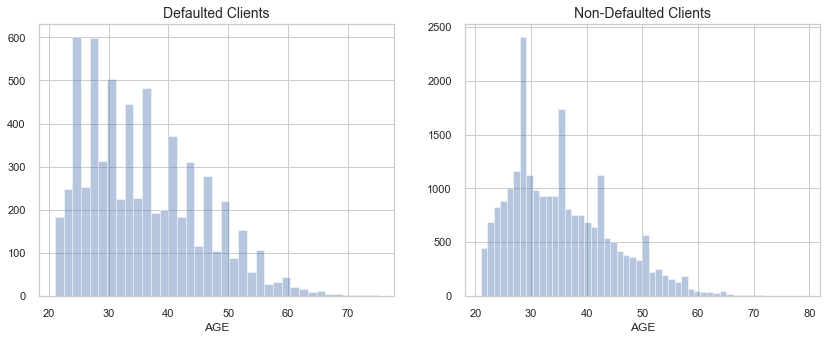

In [43]:
#AGe by Default
fig, (ax2, ax3) = plt.subplots(1, 2, figsize=(14,5))

#ax1.set_title('All Clients', fontsize=14)
ax2.set_title('Defaulted Clients', fontsize=14)
ax3.set_title('Non-Defaulted Clients', fontsize=14)

#sns.distplot(credit['AGE'], norm_hist=False, kde=False, ax=ax1); 
sns.distplot(credit['AGE'][credit['Default_Status']==0], norm_hist=False, kde=False, ax=ax3);
sns.distplot(credit['AGE'][credit['Default_Status']==1], norm_hist=False, kde=False, ax=ax2);

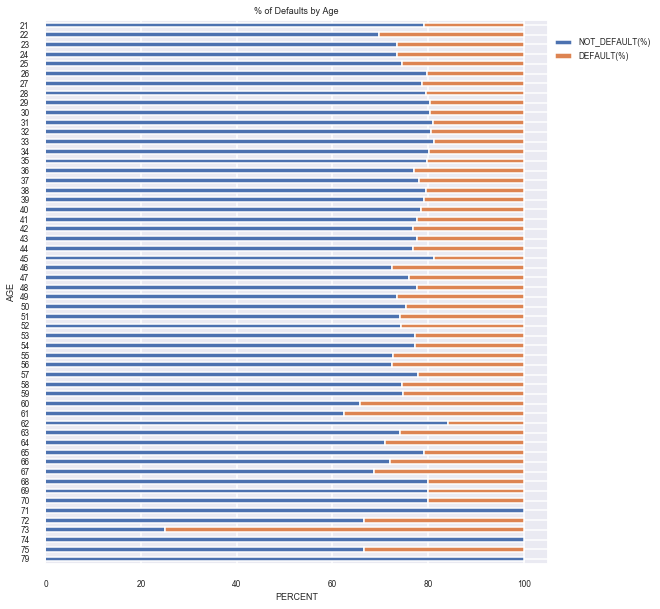

In [44]:
#Default Percentage by Age
default0 = credit.groupby(credit['AGE'][credit['Default_Status'] == 0]).size().reset_index(name='NOT_DEFAULT')
default0 = default0.fillna(0)
default1 = credit.groupby(credit['AGE'][credit['Default_Status'] == 1]).size().reset_index(name='DEFAULT')
default1 = default1.fillna(0)
total = credit.groupby('AGE').size().reset_index(name='TOTAL')

ageTable = total.join(default0.set_index('AGE'),on='AGE').join(default1.set_index('AGE'),on='AGE')
ageTable = ageTable[['AGE', 'NOT_DEFAULT', 'DEFAULT', 'TOTAL']]
ageTable = ageTable.fillna(0)
ageTable

ageTable['NOT_DEFAULT'] = round((ageTable['NOT_DEFAULT']/ageTable['TOTAL'])*100,2)
ageTable['DEFAULT'] = round((ageTable['DEFAULT']/ageTable['TOTAL'])*100,2)

agePct = ageTable.iloc[:,0:3]
agePct = agePct.rename(columns={'NOT_DEFAULT': 'NOT_DEFAULT(%)', 'DEFAULT': 'DEFAULT(%)'})

agePct


sns.set(rc={'figure.figsize':(9,10)})
sns.set_context("talk", font_scale=0.5)

ax = agePct.sort_index(ascending=False).plot(x='AGE', kind='barh', stacked=True, title='% of Defaults by Age')
ax.set_xlabel('PERCENT')
ax.get_legend().set_bbox_to_anchor((1, 0.98))
plt.show()

**OBSERVATION:**
1. 73 year old clients have the have % of defaults
2. Rest of the distribution on % defaulted is fairly consistent with all the other ages

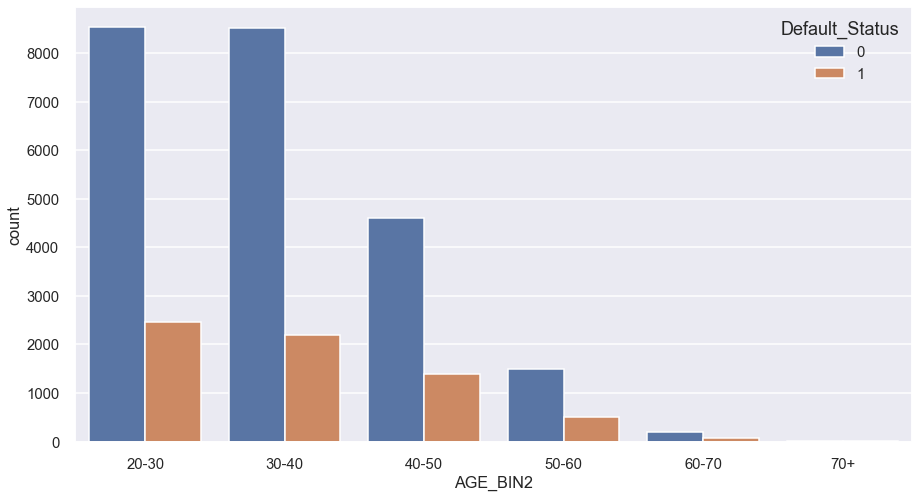

In [45]:
#Default vs Age Bin
sns.set(rc={'figure.figsize':(15,8)})
sns.set_context("talk", font_scale=0.9)

ageBin = sns.countplot(x='AGE_BIN2', hue='Default_Status', data=credit)
plt.show()

In [46]:
table_age = pd.crosstab(index=[credit.Default_Status], columns=[credit.AGE_BIN2])
table_age

AGE_BIN2,20-30,30-40,40-50,50-60,60-70,70+
Default_Status,,,,,,
0,8527,8514,4602,1493,189,10
1,2470,2188,1395,504,68,5


**Observation:**
1. 20-30 year olds make up 36.7% of population
2. 30-40 year olds make up 35.7% of population
3. 70+ year olds default ***33%*** of the time compare to other groups which there is a slighted incremental decrase with every age group going working down from 70+

- 20-30: 22% default

- 30-40: 20% default

- 40-50: 23% default

- 50-60: 25% default

- 60-70: 26% default

### 4.5 - Default Status & Credit Limit

Text(0.5, 1.0, 'Number of default Customers by Credit Limit')

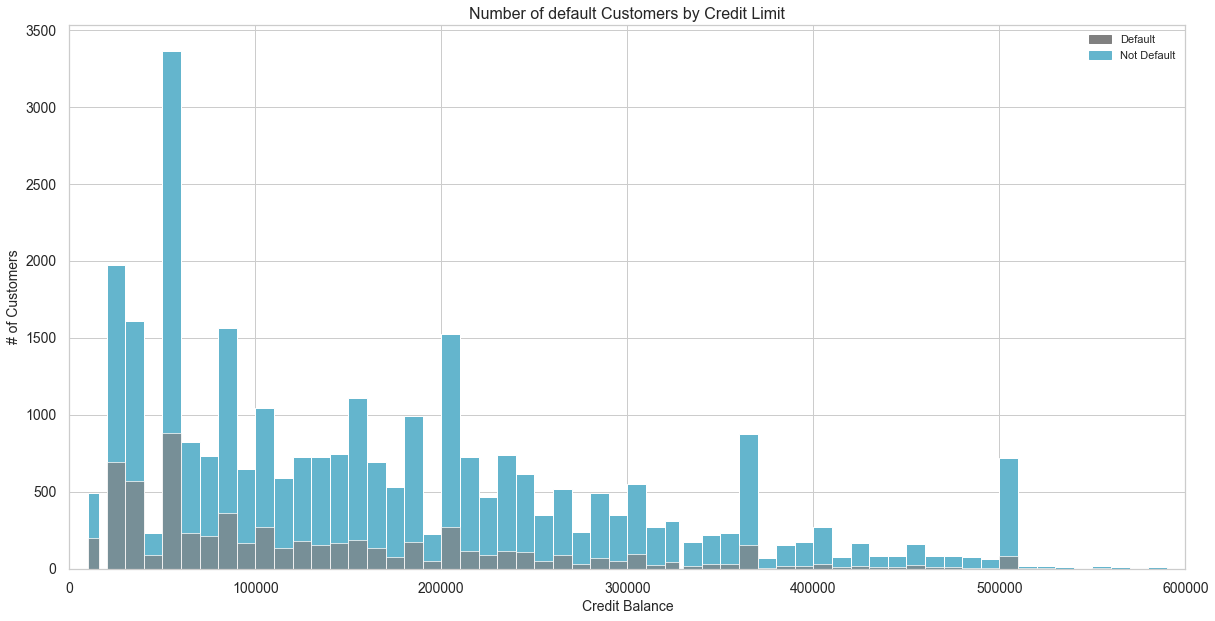

In [47]:
## Plot distribution of Credit Limit data with default, not default count
sns.set(style="whitegrid")
plt.figure(figsize=(20,10))

# Plot the graph
plt.hist(credit['LIMIT_BAL'], sorted(credit['LIMIT_BAL'].unique()), color='c')
plt.hist(credit['LIMIT_BAL'][(credit['Default_Status']==1)], sorted(credit['LIMIT_BAL'].unique()), color='grey', alpha=0.7)


# Set X and y axis labels
plt.xlabel('Credit Balance', fontsize=14)
plt.ylabel('# of Customers', fontsize=14)
plt.xlim([0,600000])
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Set the legend
gray_patch = mpatches.Patch(color='gray', label='Default')
c_patch=mpatches.Patch(color='c', label='Not Default')
plt.legend(handles=[gray_patch,c_patch],loc=1)

# Set the title
plt.title ("Number of default Customers by Credit Limit", fontsize=16)

### 4.6 - Default Status & Payment

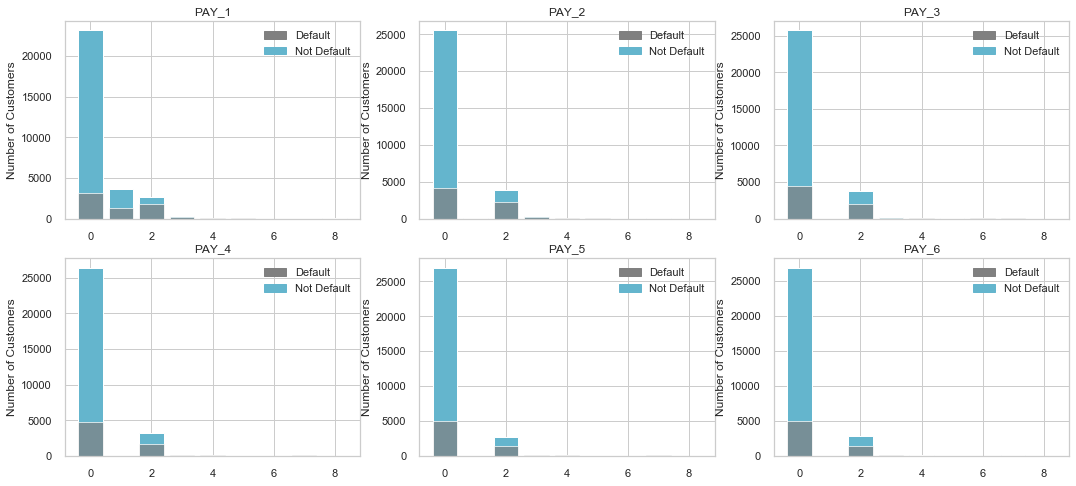

In [48]:
# List of all 6 columns
pay_status_columns =['PAY_1','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']

# Set up subplots
figure, ax = plt.subplots(2,3)
figure.set_size_inches(18,8)

# Get each column and plot in subplots (0,0),(0,1),(0,2) first and then (1,0) (1,1) (1,2) using (i/3) and (i%3)
for i in range(len(pay_status_columns)):
    row,col = int(i/3), i%3

    d  = credit[pay_status_columns[i]].value_counts()
    x = credit[pay_status_columns[i]][(credit['Default_Status']==1)].value_counts()
    ax[row,col].bar(d.index, d, align='center', color='c')
    ax[row,col].bar(x.index, x, align='center', color='gray', alpha=0.7)
    
    ax[row,col].set_ylabel("Number of Customers")
    ax[row,col].set_title(pay_status_columns[i])
    
    # Set the legend
    gray_patch = mpatches.Patch(color='gray', label='Default')
    c_patch=mpatches.Patch(color='c', label='Not Default')
    ax[row,col].legend(handles=[gray_patch,c_patch],loc=1)

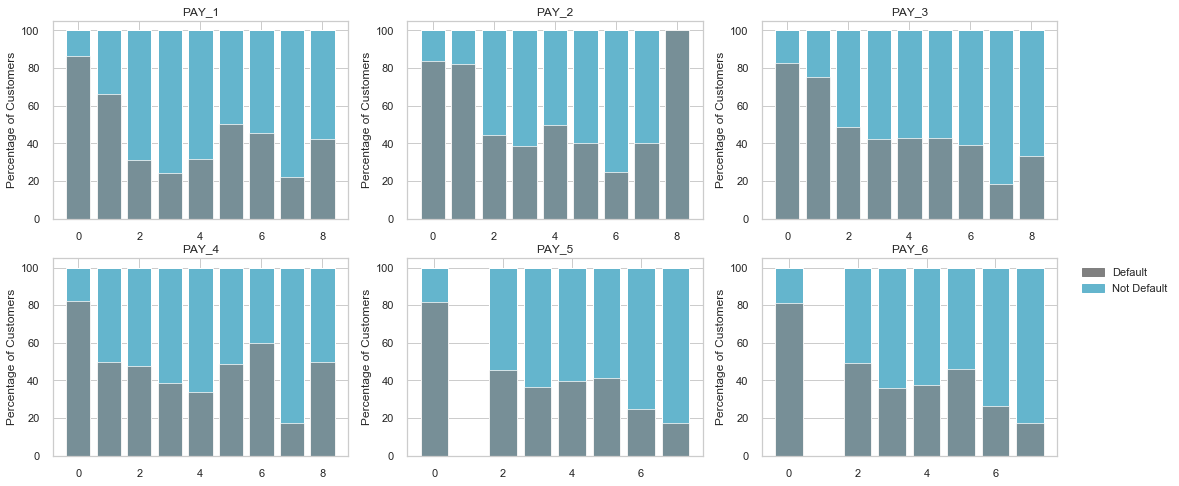

In [49]:
# List of all 6 columns
pay_status_columns =['PAY_1','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']

# Set up subplots
figure, ax = plt.subplots(2,3)
figure.set_size_inches(18,8)

# Get each column and plot in subplots (0,0),(0,1),(0,2) first and then (1,0) (1,1) (1,2) using (i/3) and (i%3)
for i in range(len(pay_status_columns)):
    row,col = int(i/3), i%3


    filter = credit[pay_status_columns[i]][(credit['Default_Status']==0)].unique()
    x= credit[pay_status_columns[i]][(credit['Default_Status']==0)].value_counts()
    d  = credit[pay_status_columns[i]][credit[pay_status_columns[i]].isin (filter)].value_counts()
    percent=x/d*100
   
    ax[row,col].bar(d.index, 100, align='center', color='c')
    ax[row,col].bar(percent.index, percent, align='center', color='gray',alpha=0.7)
    
    # Set X and Y axis labels, title
    ax[row,col].set_ylabel("Percentage of Customers")
    ax[row,col].set_title(pay_status_columns[i])
    
    # Set the legend
gray_patch = mpatches.Patch(color='gray', label='Default')
c_patch=mpatches.Patch(color='c', label='Not Default')
plt.legend(handles=[gray_patch,c_patch],bbox_to_anchor=(1.05, 1))

### 4.7 - Default Status & Bill Amount

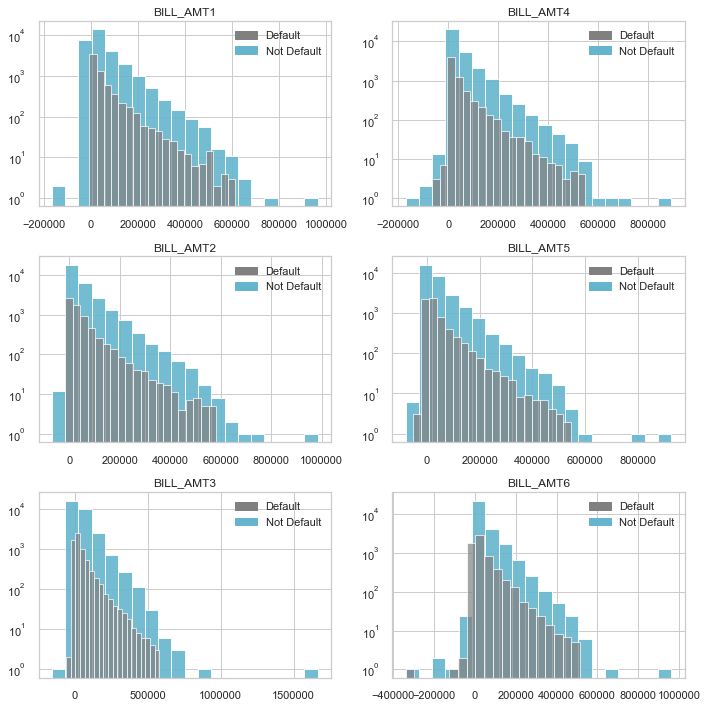

In [50]:
# List of all 6 columns
bill_amt_columns =['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']

# Set up subplots
figure, ax = plt.subplots(3,2)
figure.set_size_inches(10,10)

# Get each column and plot in subplots (0,0),(0,1),(0,2) first and then (1,0) (1,1) (1,2) using (i/3) and (i%3)

for i in range(len(bill_amt_columns)):
    row,col =  i%3, int(i/3)
   
    ax[row,col].hist(credit[bill_amt_columns[i]], bins=20, color ='c', alpha=.9)
    ax[row,col].hist(credit[bill_amt_columns[i]][(credit['Default_Status']==1)],bins=20,color='gray',alpha = 0.7)
    ax[row,col].set_title(bill_amt_columns[i])
    #adding scaling to make the graph more helpful
    ax[row,col].set_yscale('log', nonposy='clip')
    
    # Set the legend
    gray_patch = mpatches.Patch(color='gray', label='Default')
    c_patch=mpatches.Patch(color='c', label='Not Default')
    ax[row,col].legend(handles=[gray_patch,c_patch],loc=1)
    
plt.tight_layout()

### 4.8 - Default Status & Pay Amount

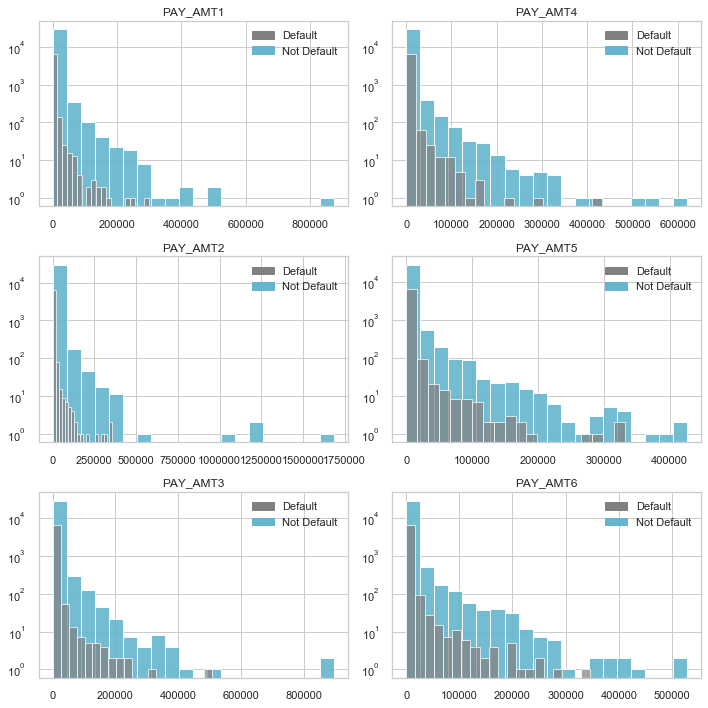

In [51]:
# List of all 6 columns
pay_amt_columns =['PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']

# Set up subplots
figure, ax = plt.subplots(3,2)
figure.set_size_inches(10,10)

# Get each column and plot in subplots (0,0),(0,1),(0,2) first and then (1,0) (1,1) (1,2) using (i/3) and (i%3)

for i in range(len(pay_amt_columns)):
    row,col =  i%3, int(i/3)
   
    ax[row,col].hist(credit[pay_amt_columns[i]], bins=20, color ='c', alpha=.9)
    ax[row,col].hist(credit[pay_amt_columns[i]][(credit['Default_Status']==1)],bins=20,color='gray',alpha = 0.7)
    ax[row,col].set_title(pay_amt_columns[i])
    #adding scaling to make the graph more helpful
    ax[row,col].set_yscale('log', nonposy='clip')
    
    # Set the legend
    gray_patch = mpatches.Patch(color='gray', label='Default')
    c_patch=mpatches.Patch(color='c', label='Not Default')
    ax[row,col].legend(handles=[gray_patch,c_patch],loc=1)
    
plt.tight_layout()

## 5.0 - Multivariate Analysis of Defaulting or Not

Explore and analyze data information cross multiple features using Default Status as constant

1. Default Status -vs- Gender by Age
2. Default Status -vs- Gender by Education
3. Default Status -vs- Gender by Marriage Status

### 5.1 - Default Status by Gender by Age

<Figure size 1080x1080 with 0 Axes>

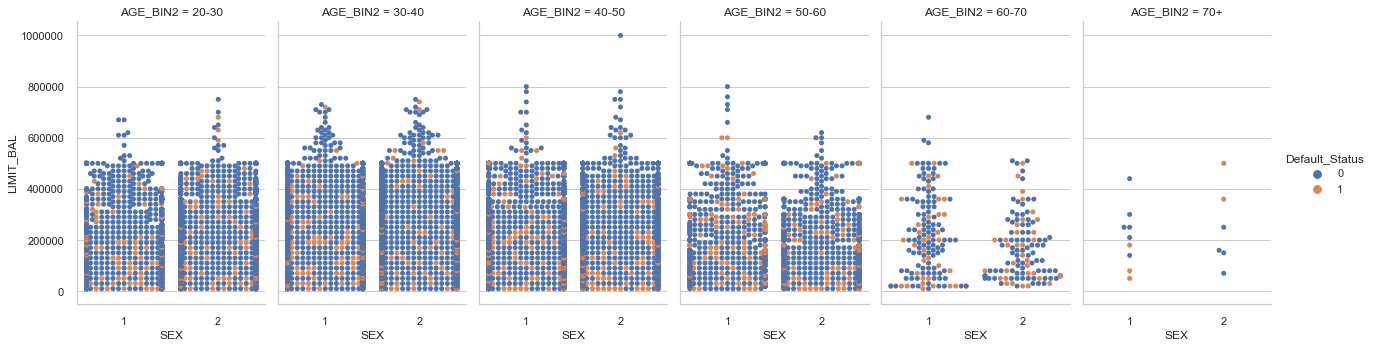

In [52]:
#Cat Plot: credit balance & default status distributed by Gender and Age
plt.figure(figsize=(15,15))
sns.catplot(x="SEX", y="LIMIT_BAL", hue="Default_Status", kind="swarm",
            col="AGE_BIN2", aspect=.6, data=credit);

In [53]:
table_gender_age = pd.crosstab(index=[credit.Default_Status,credit.SEX], columns=[credit.AGE_BIN2])
table_gender_age.unstack()

AGE_BIN2       20-30       30-40       40-50       50-60      60-70     70+   
SEX                1     2     1     2     1     2     1    2     1   2   1  2
Default_Status                                                                
0               2922  5605  3347  5167  1939  2663   686  807   105  84   6  4
1                912  1558  1013  1175   645   750   261  243    35  33   3  2

**OBSERVATION:**
1. Female has highest credit limit balance associated with it in age group 40-50
2. High % of ***NOT DEFAULTING*** are females within the 30-40 age range at 81%
3. both Males and Females over 70 have a 33% chance of defaulting

**ADDITIONAL:**
1. 20-30 - 65% Female population with a 22% Defaulted -vs- 35% Male population w/ 24% Defaulted
2. 30-40 - 59% Females pop. w/ 19% Defaulted -vs- 41% Male pol w/ 23% Defaulted
3. 40-50 - 57% Female pop. w/ 22% Defaulted -vs- 43% Male w/ 25% Defaulted
4. 50-60 - 53% Female pop. w/ 23% Defaulted -vs- 44% Male w/ 28% Defaulted
5. 60-70 - 46% Female pop. w/ 28% Defaulted -vs- 54% Male w/ 25% Defaulted
6. 70+ - 40% Female pop. w/ 33% Defaulted -vs- 60% Male w/ 33% Defaulted

***Take Away:*** Females have better record for not defaulting across the age group

## Default Status by Gender and Education

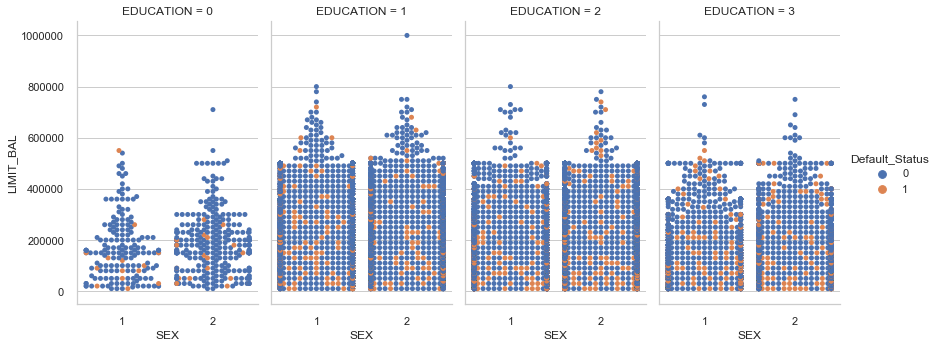

In [55]:
#Cat Plot: Education by Gender Categories by Default Status
sns.catplot(x="SEX", y="LIMIT_BAL", hue="Default_Status",
            col="EDUCATION", aspect=.6, kind="swarm", data=credit);

In [56]:
table_gender_edu = pd.crosstab(index=[credit.Default_Status,credit.SEX], columns=[credit.EDUCATION])
table_gender_edu.unstack()

EDUCATION         0          1           2           3      
SEX               1    2     1     2     1     2     1     2
Default_Status                                              
0               156  279  3442  5089  3962  6729  1445  2233
1                14   19   904  1128  1406  1922   545   692

**OBSERVATION**
1. female continue to show better percentate at not defaulting when compare to males across education level

## Default Status by Gender and Marriage

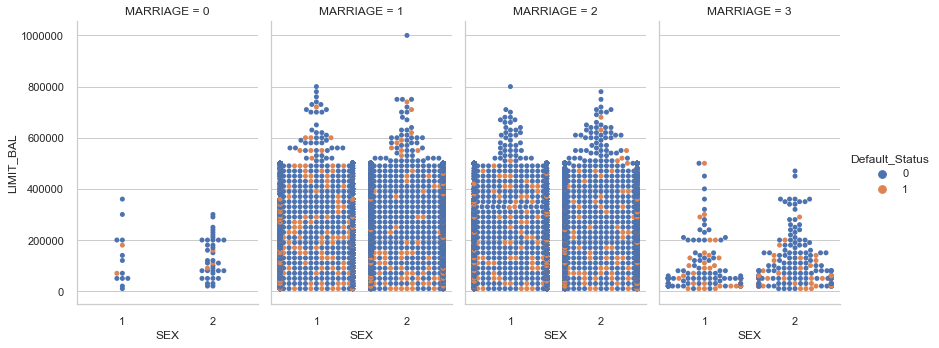

In [58]:
#Cat Plot: credit balance distributed by Marriage and Sex
sns.catplot(x="SEX", y="LIMIT_BAL", hue="Default_Status", kind="swarm",
            col="MARRIAGE", aspect=.6, data=credit);

**OBSERVATION:**
1. Distribution of credit limit is fairly symmetric

In [59]:
table_age = pd.crosstab(index=[credit.Default_Status,credit.SEX], columns=[credit.MARRIAGE])
table_age.unstack()

MARRIAGE         0         1           2         3     
SEX              1   2     1     2     1     2   1    2
Default_Status                                         
0               12  37  3841  6601  5061  7544  91  148
1                2   3  1343  1858  1484  1856  40   44

**OBSERVATION:**
Single Males & Females did not default as much compare to Married counterparts. 
- Not Defaulting %: Single Female (80%) -vs- Married Female (78%)
- Not Defaulting %: Single Male (77%) -vs- Married Male (74%)

Divorce females and males had highest default percentages at 23% (female) and 31% (males)

## Default Status by Age and Education

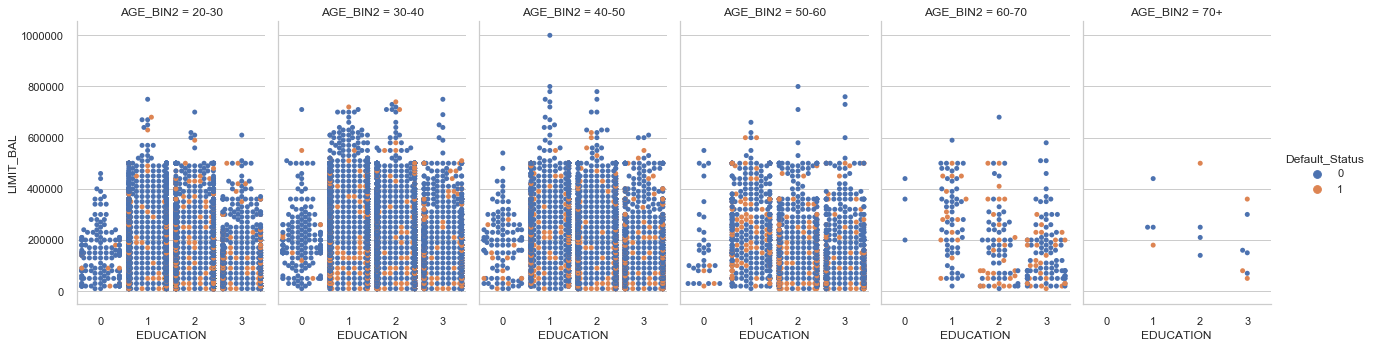

In [61]:
#Cat Plot: Education by Age Categories by Default Status
sns.catplot(x="EDUCATION", y="LIMIT_BAL", hue="Default_Status",
            col="AGE_BIN2", aspect=.6,
            kind="swarm", data=credit);

**OBSERVATION:**
1. distribution of credit limit among education categories by age seem consistent
2. distribution of default status seems equally distributed

In [62]:
table_age = pd.crosstab(index=[credit.Default_Status,credit.EDUCATION], columns=[credit.AGE_BIN2])
table_age.unstack()

AGE_BIN2       20-30                  30-40                   40-50        \
EDUCATION          0     1     2    3     0     1     2     3     0     1   
Default_Status                                                              
0                151  3496  4093  787   156  3344  3945  1069    95  1275   
1                  9   799  1369  293     8   782  1087   311    12   323   

AGE_BIN2        ... 50-60      60-70             70+           
EDUCATION       ...     2    3     0   1   2   3   0  1  2  3  
Default_Status  ...                                            
0               ...   518  584     3  52  50  84   0  3  3  4  
1               ...   192  196     0  15  27  26   0  1  1  3  

[2 rows x 24 columns]

**Observation:**
1. Millennials (27% of pop) - 24% Defaulted; 76% Not Defaulted
2. Adults (26% of pop) - 19% Defaulted; 81% Not Defaulted
3. Early Boomers (23% of pop) - 21% Defaulted; 79% Not Defaulted
4. Late Boomers (25% of pop) - 24% Defaulted; 76% Not Defaults

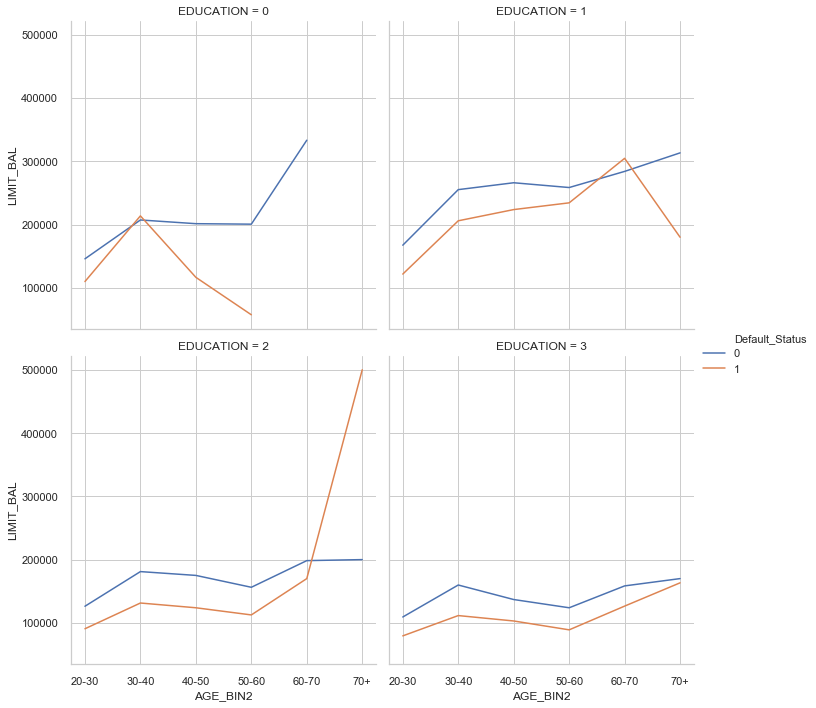

In [63]:
sns.relplot(x="AGE_BIN2", y="LIMIT_BAL", hue="Default_Status",
                col="EDUCATION",ci=None, col_wrap=2, data=credit,kind='line')

**OBSERVATION**
1. High School clients typically have lower defaults
2. Grad school clients have higher defaults percentage with higher credit balances

## Features Transformation

In [64]:
#Label Encode SEX & Default Status, 2 class variable

le = LabelEncoder()
le.fit(credit['SEX'])
credit['SEX']=le.transform(credit['SEX'])

In [65]:
le = LabelEncoder()
le.fit(credit['Default_Status'])
credit['Default_Status']=le.transform(credit['Default_Status'])

In [66]:
#ONE HOT ENCODE EDUCATION 
#Create 4 new Education columns
credit=pd.get_dummies(credit, prefix=['EDUCATION'], columns=['EDUCATION'])

In [67]:
#ONE HOT ENCODE MARRIAGE feature
credit['MARRIAGE'].replace({1: "Married",
                          2: "Single",
                          3: "Divorced",
                          0: "Others"}, inplace=True)
credit=pd.get_dummies(credit, prefix=['MARRIAGE'], columns=['MARRIAGE'])


**OBSERVATION/EXPECTATION:**
1. Marriage split into 4 units Marriage_Married, Marriage_Single,...
2. Education split into 4 units - Education_grad school, Education_university, ...

## CORRELATION 

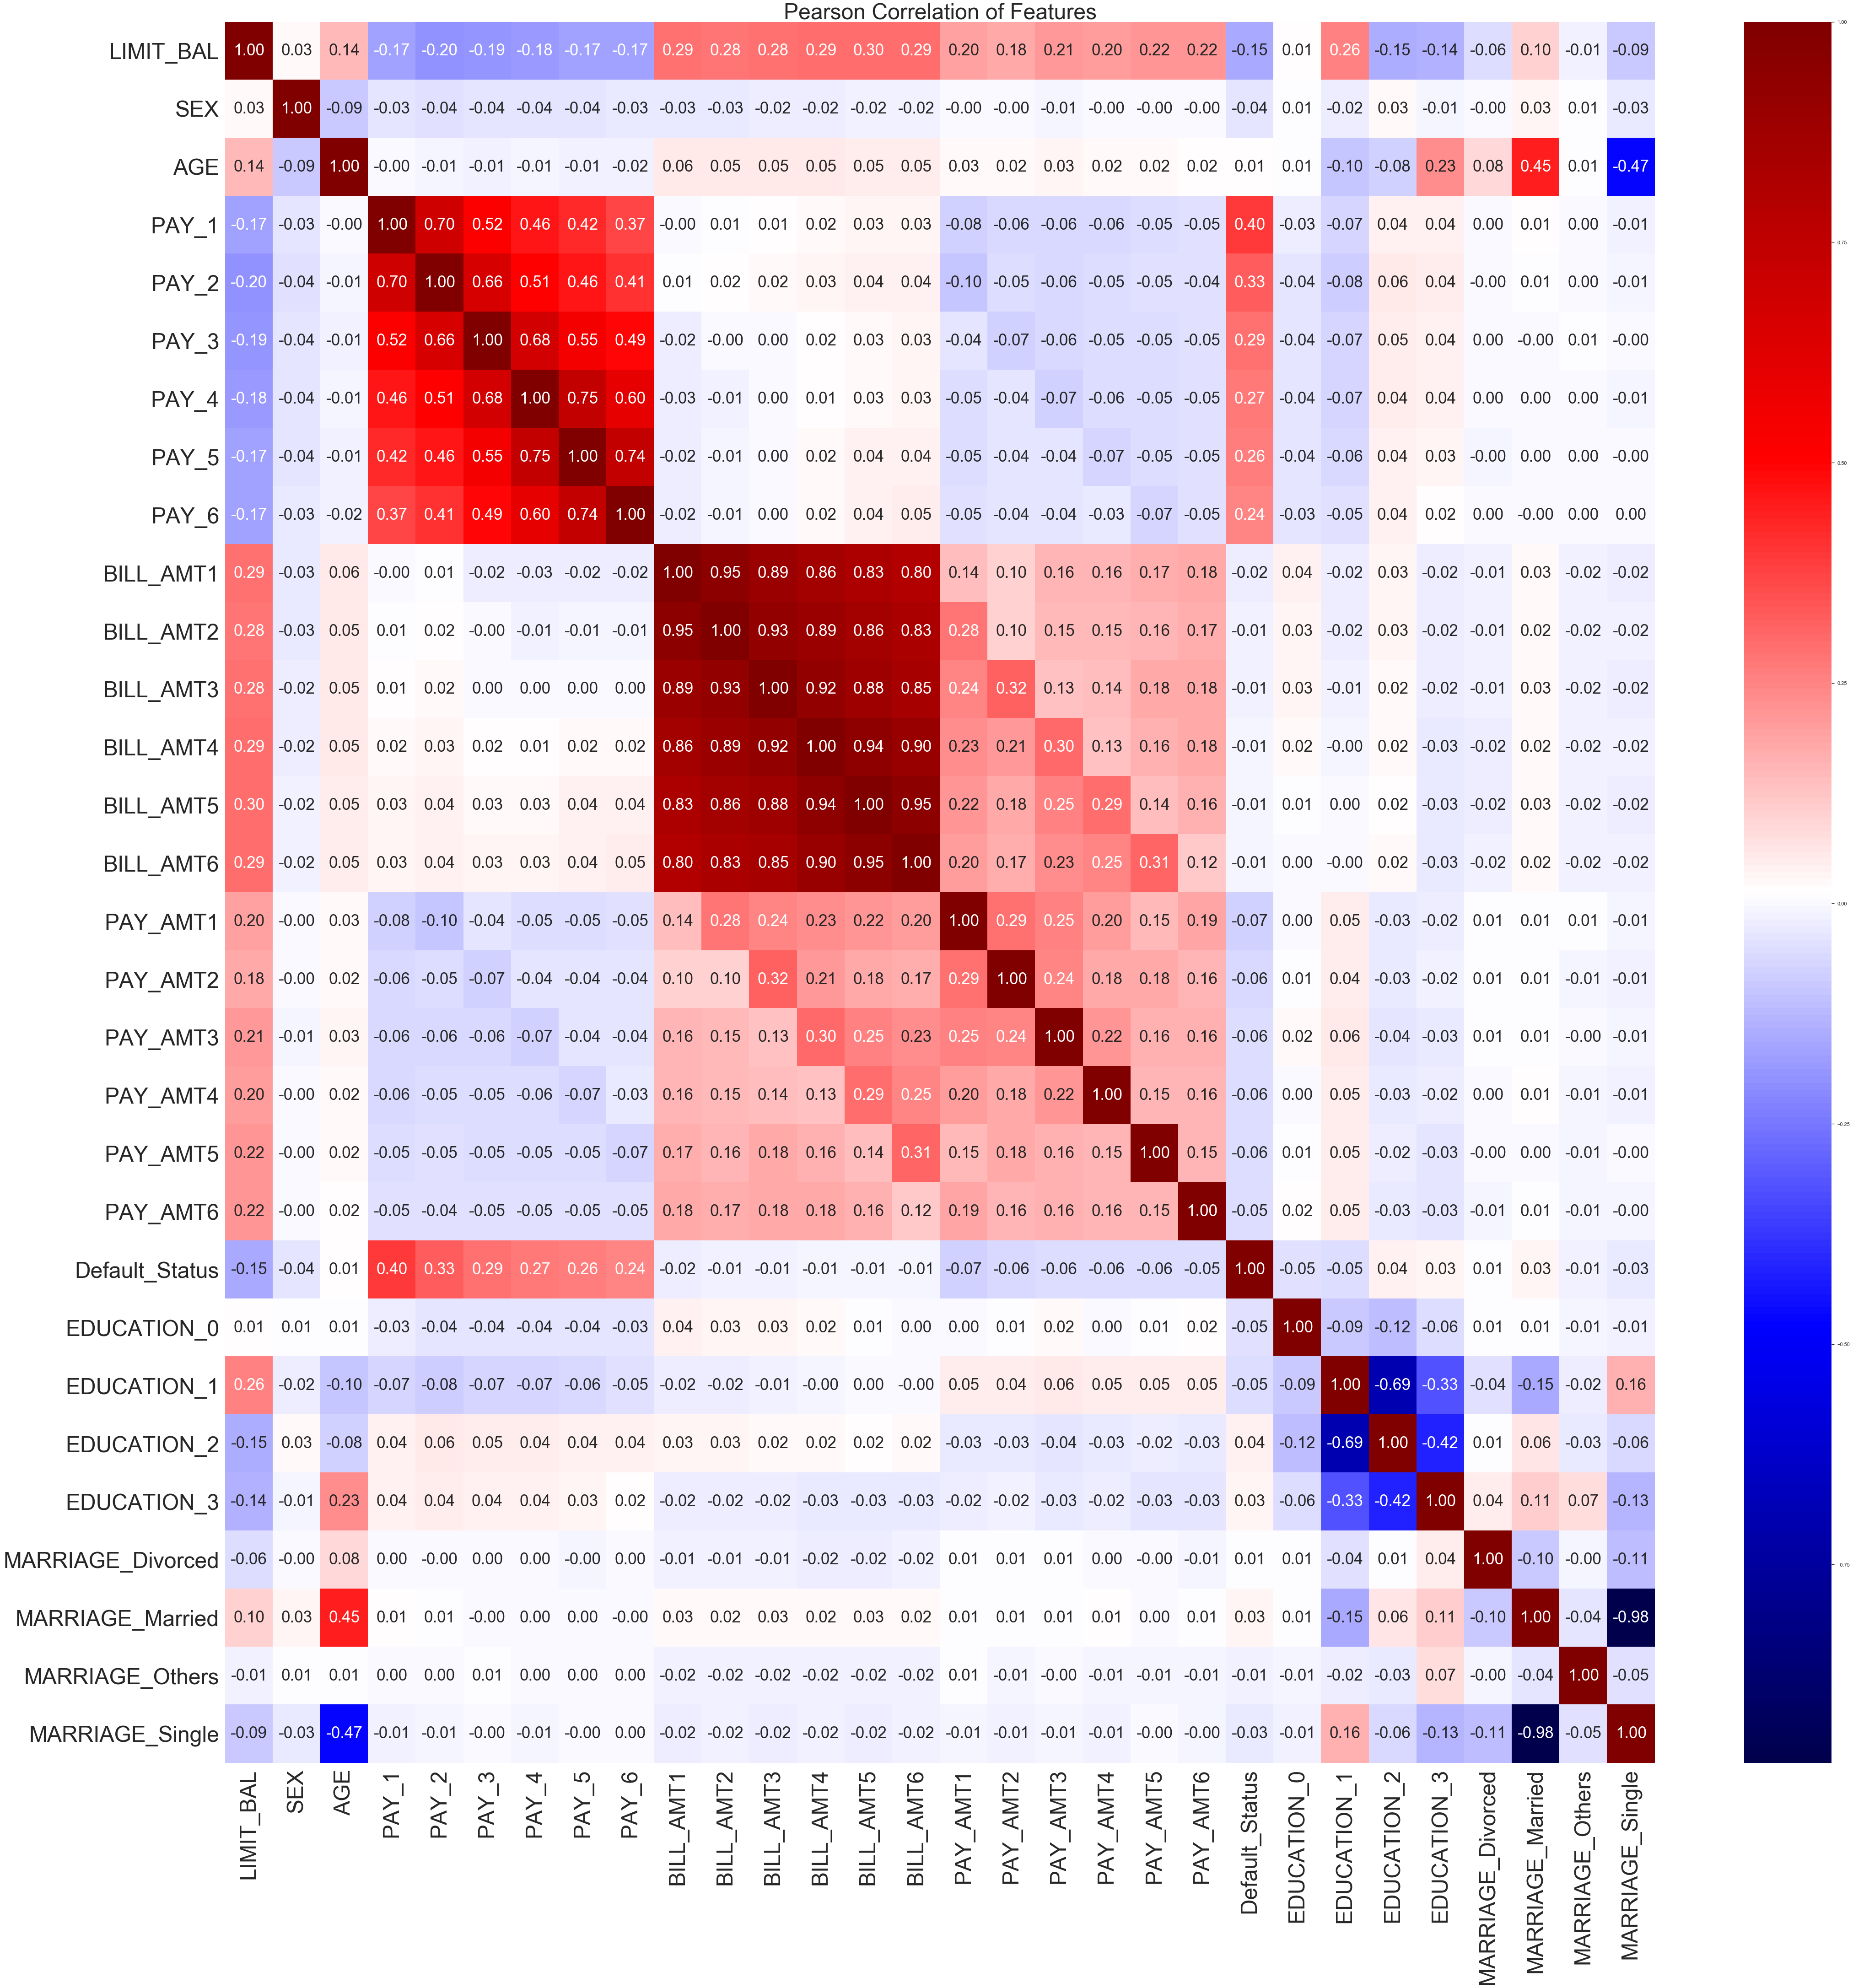

In [68]:
## Visualize the Correlation matrix

# Configure x and y axis
corrMat=credit.corr()
sns.set()
plt.figure(figsize=(70,70))
plt.xticks(fontsize=48)
plt.yticks(fontsize=48)
plt.title('Pearson Correlation of Features', size =48)

# Plotting the data using heatmap
g = sns.heatmap(corrMat,annot=True,cmap="seismic",annot_kws={"size": 35},fmt=".2f")

**OBSERVATION:**
1. Payment Status (PAY0-Pay6) is highly correlated to each other
2. Bill Amount (Bill_Amt1-Bill_Amt6) is highly correlated to each other
3. Default Status have strong correlation to Payment status
4. Pay1-6, Default Status, Education_1-3, and Marriage_Single have low or negative correlation to LIMIT_Bal (target var)

In [69]:
#Covariance
#Covariance is often used to gauge the linear degree of change between two variables. This is important when studying
#the impact features might have on default rates
covMat=credit.cov()
print(covMat)

                      LIMIT_BAL          SEX            AGE         PAY_1  \
LIMIT_BAL          1.683769e+10  1587.661442  173039.339301 -16877.873897   
SEX                1.587661e+03     0.239246      -0.410621     -0.012879   
AGE                1.730393e+05    -0.410621      84.998429     -0.009829   
PAY_1             -1.687787e+04    -0.012879      -0.009829      0.578744   
PAY_2             -2.050707e+04    -0.017530      -0.064945      0.426370   
PAY_3             -1.961575e+04    -0.015882      -0.103301      0.311113   
PAY_4             -1.782781e+04    -0.014731      -0.050299      0.266606   
PAY_5             -1.582440e+04    -0.013464      -0.086958      0.231846   
PAY_6             -1.556707e+04    -0.011153      -0.110926      0.203506   
BILL_AMT1          2.732380e+09 -1213.254869   38091.519524    -27.982760   
BILL_AMT2          2.575221e+09 -1086.999787   35534.308472    512.419937   
BILL_AMT3          2.553507e+09  -834.307489   34258.762123    719.189774   